<a href="https://colab.research.google.com/github/dishant26/layout-with-ocr/blob/main/Tutorials/Tutorial_Image_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone the Layout-with-OCR Repository

In [ ]:
!git clone https://github.com/dishant26/layout-with-ocr.git

Cloning into 'layout-with-ocr'...
remote: Enumerating objects: 274, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 274 (delta 3), reused 1 (delta 1), pack-reused 265
Receiving objects: 100% (274/274), 43.41 MiB | 27.02 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [ ]:
cd "layout-with-ocr/"

/content/layout-with-ocr


## Installing the Packages
#### Restart Runtime after installing all the packages.

In [ ]:
!sh packages.txt

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-halzpmrs
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-halzpmrs
     |████████████████████████████████| 50 kB 2.9 MB/s 
     |████████████████████████████████| 74 kB 2.7 MB/s 
     |████████████████████████████████| 147 kB 45.9 MB/s 
     |████████████████████████████████| 130 kB 47.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 749 kB 41.3 MB/s 
     |████████████████████████████████| 843 kB 50.5 MB/s 
     |████████████████████████████████| 596 kB 49.5 MB/s 
     |████████████████████████████████| 112 kB 27.4 MB/s 
  Created wheel for detectron2: filename=detectron2-0.6-cp37-cp37m-linux_x86_64.whl size=5696152 sha256=9681bcb0bdc9688c4483081cbde2b910886b7041ca4e694b0a1b3865e02dab07
  Stored in directory: /tmp/pip-ephem-wheel-cache-w0nmddkg/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7

## For OCR of a directory of Images


*   #### Enter **"No"** when asked **Do you wish to use Layout Inference?**
*   #### Select the Language Model to be applied on the image.
*   #### Enter the name of the output directory.
*   #### Enter the path of the directory of input images.


---


###   3 Output Files will be generated for each image in the entered output directory 

*   #### **JSON file** - Detected text with the bbox and confidence value.
*   #### **TXT file** - OCRed Text from the image.
*   #### **HOCR file** - Detected text with bbox and confidence value in the HOCR format.


In [ ]:
!python lp_ocr.py

Do you wish to use Layout Inference? (yes or no)no
1. san_iitb
2. san
3. eng
Choose the language model for OCR from the above list: 1
Selected language model: san_iitb
Directory for OCR output: 
output_b
Enter the name of our image folder for OCR: 
/content/layout-with-ocr/test_img
OCR-ing images...

OCR-ing images...

OCR-ing images...

OCR-ing images...

OCR-ing images...

OCR-ing images...

OCR-ing images...

OCR is complete. Please find the output in the provided output directory.


# Visualize the Results
*   #### Enter the path of the Input Image you want to visualize.
*   #### Enter the path of the OCR Output directory

Enter the path of the Image: 
/content/layout-with-ocr/test_img/GK2_page-0284.jpg
Enter the path of the OCR Output Folder: 
/content/layout-with-ocr/output_b


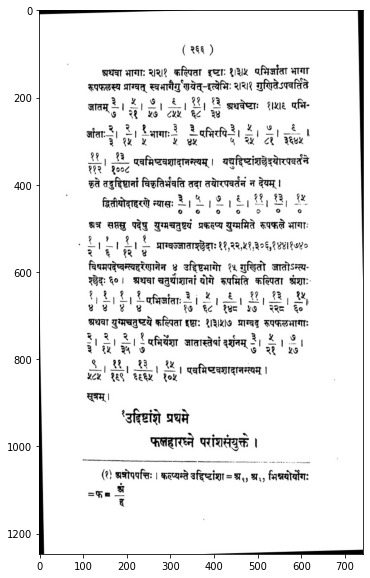

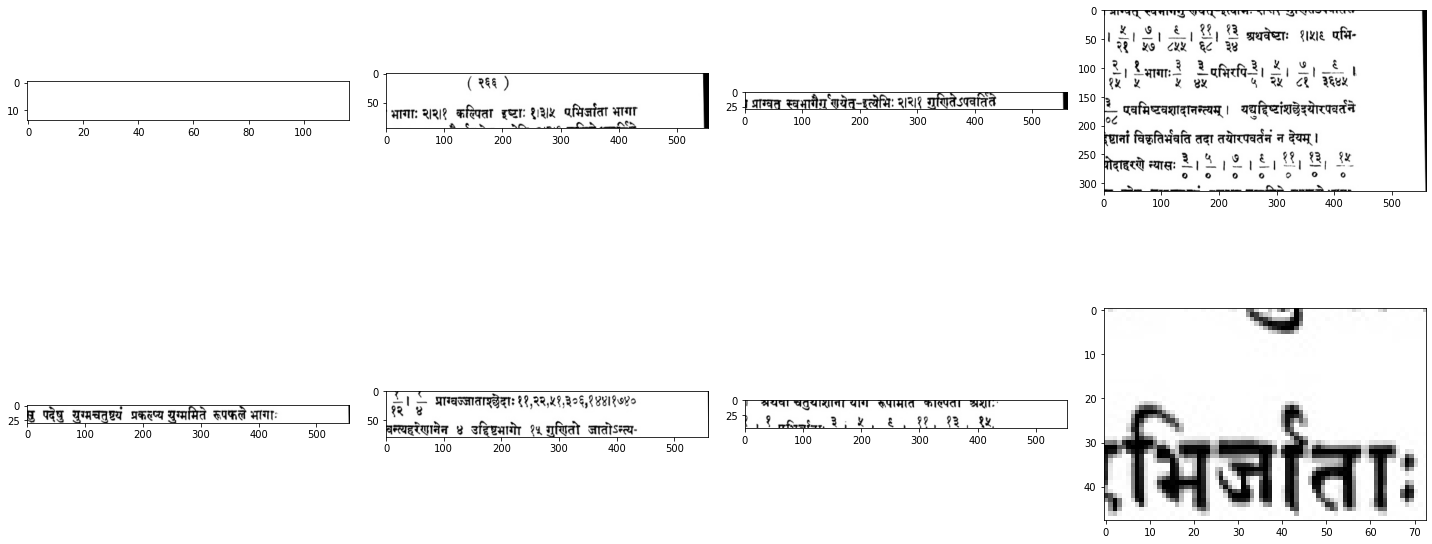

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
from math import ceil, floor
import json

img_path = input("Enter the path of the Image: \n")
output_dir = input("Enter the path of the OCR Output Folder: \n")

if os.path.exists(img_path):
  image = cv2.imread(img_path)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.imshow(image)
  img_path = img_path.split("/")[-1]
  if img_path.endswith('.jpeg'):
    x = img_path[:-5]
    x = x + "_ocr_tasks.json"
  else:
    x = img_path[:-4]
    x = x + "_ocr_tasks.json"
    json_path = output_dir + "/" + x
    if os.path.exists(json_path):
      f = open(json_path)
      d = json.load(f)
      imgs = []

      for i in range(len(d[0]["predictions"][0]["result"])):
        if i%2==0:
          x = floor((d[0]["predictions"][0]["result"][i]["value"]["x"] * image.shape[0]) / 100)
          y = floor((d[0]["predictions"][0]["result"][i]["value"]["y"] * image.shape[1]) / 100)
          width = floor((d[0]["predictions"][0]["result"][i]["value"]["width"] * image.shape[0]) / 100)
          height = floor((d[0]["predictions"][0]["result"][i]["value"]["height"] * image.shape[1]) / 100)
          cropped_image = image[y:(y+height), x:(x+width)]
          imgs.append(cropped_image)

      r = ceil(len(imgs)/4)
      c = 4

      fig, axs = plt.subplots(r, c, figsize=(20, 10))
      fig.subplots_adjust(hspace = 0, wspace=0)

      axs = axs.ravel()
      # print(r,c,len(imgs))
      for i in range(len(imgs)):
        axs[i].imshow(imgs[i])
      for i in range((len(imgs)), (r*c)):
        fig.delaxes(axs[i])
      
      plt.tight_layout()
      plt.show()